In [1]:
import torch
import module as md
import model as m
import generate as gen
torch.set_grad_enabled(False)
torch.manual_seed(123)


sample_size = 1000


train_input, train_target = gen.generate_set(sample_size)
test_input, test_target = gen.generate_set(sample_size)


layers = [md.Linear(2, 25), md.ReLU(), md.Linear(25, 25), md.ReLU(), md.Linear(25, 25),
          md.ReLU(), md.Linear(25, 2), md.Tanh()]
model = m.Model(layers)


m.train_model(model, train_input, train_target, n_epochs=250)
print("Train accuracy: %f" % m.accuracy(train_target, model(train_input)))
print("Test accuracy: %f" % m.accuracy(test_target, model(test_input)))


TypeError: div() missing 1 required positional arguments: "other"

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
train = train_input.numpy()
target = train_target.argmax(dim=1).sub(model(train_input).argmax(dim=1)).eq(0).numpy()

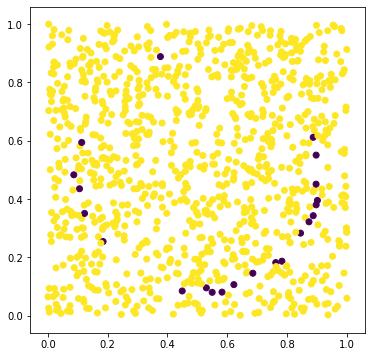

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(train[:, 0], train[:, 1], c=target)

In [17]:
train = test_input.numpy()
target = test_target.argmax(dim=1).sub(model(test_input).argmax(dim=1)).eq(0).numpy()

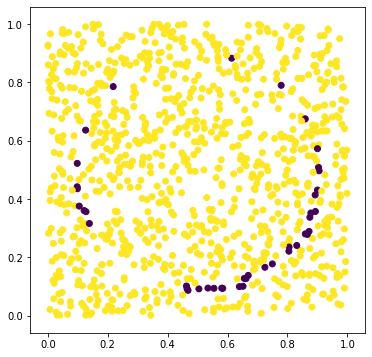

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(train[:, 0], train[:, 1], c=target)